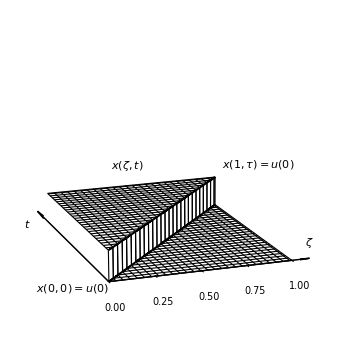

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
t0 = 0
tau = 1.5
zeta_vals = np.linspace(0, 1, 1000)
t_vals = np.linspace(t0, t0 + tau, 1000)
ZETA, T = np.meshgrid(zeta_vals, t_vals)

# Step function surface
X = np.where(T < t0 + tau * ZETA, 0, 1)

# Plot setup
fig = plt.figure(figsize=(3.5, 3.5))
azim_angle = 250
elev_angle = 15
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=elev_angle, azim=azim_angle)

# Plot wireframe surface
ax.plot_wireframe(ZETA, T, X, color='black', linewidth=0.8, rstride=38, cstride=38)
ax.contour3D(
    ZETA, T, X,
    levels=[0.999], colors='black', linewidths=1.45
)
ax.contour3D(
    ZETA, T, X,
    levels=[0.001], colors='black', linewidths=1.45
)
# Clean up background walls and grid
ax.grid(False)
ax.xaxis.pane.set_visible(False)
ax.yaxis.pane.set_visible(False)
ax.zaxis.pane.set_visible(False)
ax.xaxis._axinfo["grid"]['linewidth'] = 0
ax.yaxis._axinfo["grid"]['linewidth'] = 0
ax.zaxis._axinfo["grid"]['linewidth'] = 0

# Hide z-axis ticks and spine
ax.set_zticks([])
ax.set_zticklabels([])
ax.zaxis.line.set_color((0, 0, 0, 0))

# Remove tick marks (lines) from t and zeta axes
ax.tick_params(axis='x', length=0)
ax.tick_params(axis='y', length=0)

# Change axis spine (line) colors to gray for better contrast
ax.xaxis.line.set_color('gray')
ax.yaxis.line.set_color('gray')

# Manual z-axis label
ax.text(0.02, 0.02, 3.5, "$x(\\zeta,t)$", fontsize=8)

# Boundary condition annotations
ax.text(0, t0, 0.0, "$x(0, 0) = u(0)$", fontsize=8, ha="right", va="top")
ax.text(1.0, t0 + tau - 0.15, 1.5, "$x(1, \\tau) = u(0)$", fontsize=8)

# Axis labels and limits
# ax.set_xlabel("$\\zeta$", fontsize=8, labelpad=4)
# ax.set_ylabel("$t$", fontsize=8, labelpad=4)
ax.text(-0.12, t0 + tau, 0.0, "$t$", fontsize=8, ha='center', va='center', rotation=90)
# Draw an arrow from origin to (0, tau, 0) to represent the t-axis
ax.quiver(0, 0, 0, 0, 1.2*tau, 0, arrow_length_ratio=0.1, color='black', linewidth=1.0)

ax.text(1.1, 0, 0.5, "$\zeta$", fontsize=8, ha='center', va='center', rotation=0)
ax.quiver(0, 0, 0, 1.1, 0, 0, arrow_length_ratio=0.05, color='black', linewidth=1.0)



# Remove tick labels and lines from t-axis
ax.set_yticks([])
ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
ax.yaxis._axinfo['tick']['inward_factor'] = 0.0
ax.yaxis._axinfo['tick']['outward_factor'] = 0.0

# Optional: do the same for zeta-axis
# ax.set_xticks([])
# ax.xaxis._axinfo['tick']['inward_factor'] = 0.0
# ax.xaxis._axinfo['tick']['outward_factor'] = 0.0

ax.tick_params(labelsize=7)
ax.set_xlim(0, 1.1)
ax.set_ylim(t0, t0 + tau)
ax.set_zlim(0, 5)

plt.tight_layout()
# plt.savefig('transport_delay.svg', format='svg', bbox_inches='tight')
plt.savefig('transport_delay.png', format='png', bbox_inches='tight', dpi=300)
plt.show()